In [93]:
#============================
#Spam classification

In [260]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam (4).csv


In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
df=pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [391]:
#shape
df.shape

(5572, 5)

In [392]:
#1.Data cleaning
#2.EDA
#3. Text Preprocessing
#4.model building
#5.Evaluation
#6.improvement
#7.website
#8.Deploy

In [393]:
#1.Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [394]:
#from info we can see that there are few columns which are not in use so we can drop those columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [395]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [396]:
#sample
df.sample(5)

,v1,v2
2533,ham,Glad it went well :) come over at 11 then we'l...
3660,ham,Well then you have a great weekend!
563,spam,GENT! We are trying to contact you. Last weeke...
4062,ham,How are you. Its been ages. How's abj
5503,ham,Perhaps * is much easy give your account ident...


In [397]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [398]:
df.sample(5)

,target,text
12,spam,URGENT! You have won a 1 week FREE membership ...
1827,ham,Hey gorgeous man. My work mobile number is. Ha...
2753,ham,"Derp. Which is worse, a dude who always wants ..."
4157,ham,It certainly puts things into perspective when...
4569,spam,Wanna have a laugh? Try CHIT-CHAT on your mobi...


In [399]:
#standardisation
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['target'])
df['target']=encoder.transform(df['target'])


In [400]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [401]:
#missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [402]:
#check for duplicate values
df.duplicated().sum()

403

In [274]:
#drop duplicate values
df=df.drop_duplicates(keep='first')

In [403]:
#check
df.duplicated().sum()

403

In [404]:
#check
df.shape

(5572, 2)

In [405]:
#Basic cleaning part is done

**2.EDA**

In [406]:
#value counts
t=df['target'].value_counts()
t

target
0    4825
1     747
Name: count, dtype: int64

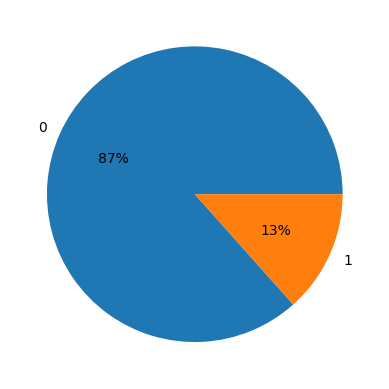

In [407]:
#pie chart
plt.pie(t,labels=t.index,autopct='%.0f%%')
plt.show()

In [408]:
#From data we can say that the data is imbalance
#ham(0)=87%
#spam(1)=13%

In [409]:
#we can also count no of character, no of words in ham and spam for that
#we will have to install nltk

In [410]:
!pip install nltk

In [411]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [412]:
df['num_character']= df['text'].apply(len) #Indicates the no of character in each sms

In [284]:
df['num_character']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_character, Length: 5169, dtype: int64

In [413]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [414]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [415]:
df['num_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5572, dtype: int64

In [416]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [417]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [418]:
df['num_sentences']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5572, dtype: int64

In [419]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [420]:
#describe
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [421]:
#describe ham
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [422]:
#describe spam
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_character', ylabel='Count'>

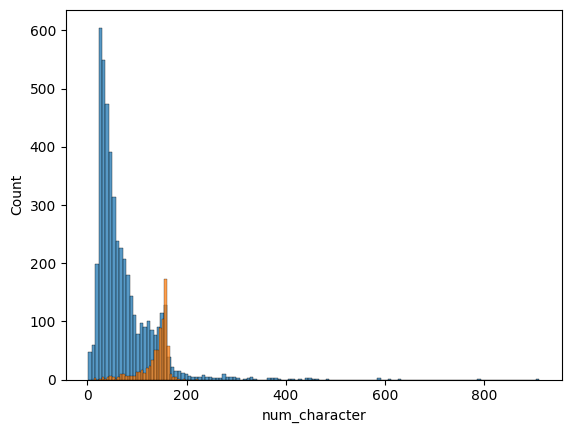

In [423]:
#Histogram
sns.histplot(df[df['target']==0]['num_character'])#here we can see that ham messages have more characters
sns.histplot(df[df['target']==1]['num_character'])#spam messages have less characters

<Axes: xlabel='num_words', ylabel='Count'>

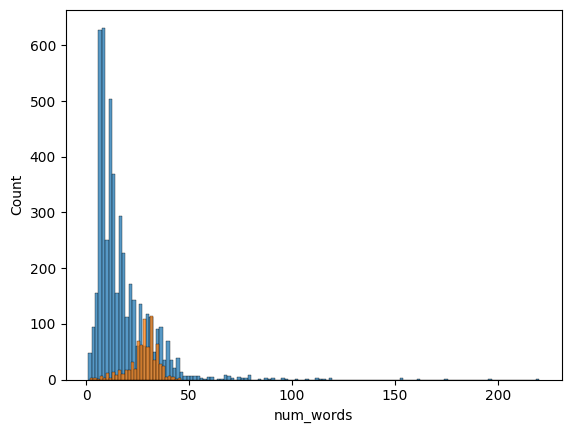

In [424]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

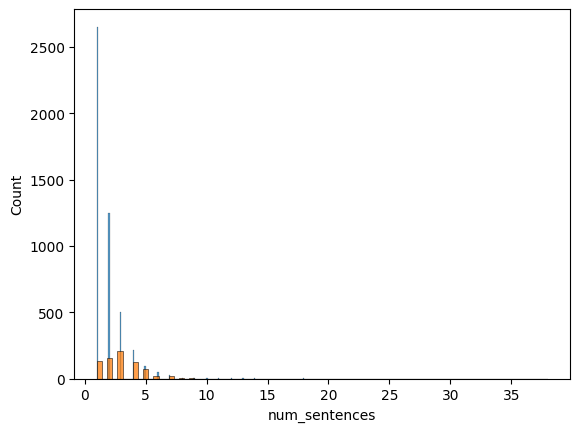

In [425]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'])

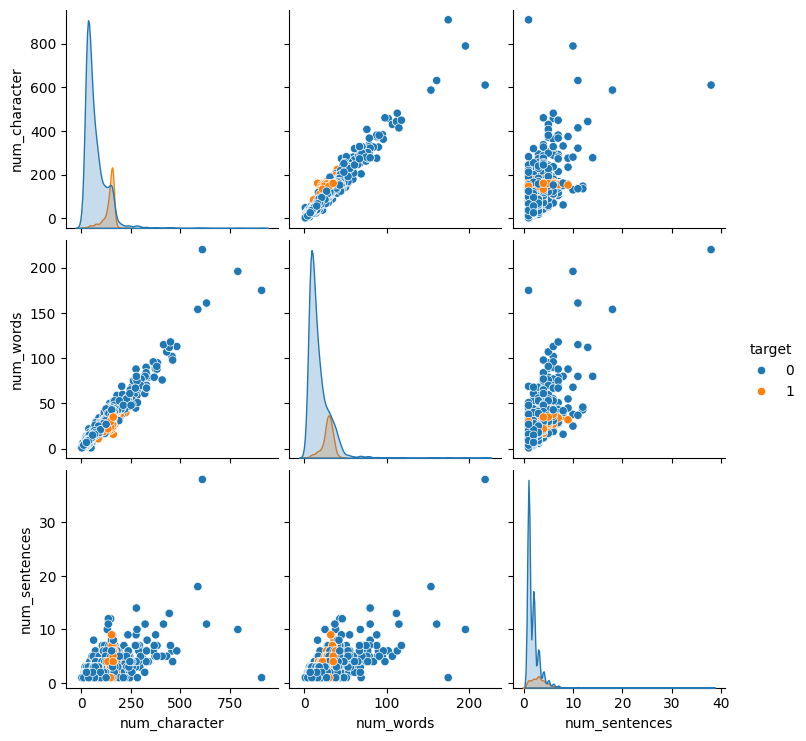

In [426]:
#pairplot
sns.pairplot(df,hue='target')

In [259]:
#correlation
df=df.select_dtypes('number')
df.corr()

,target,num_character,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

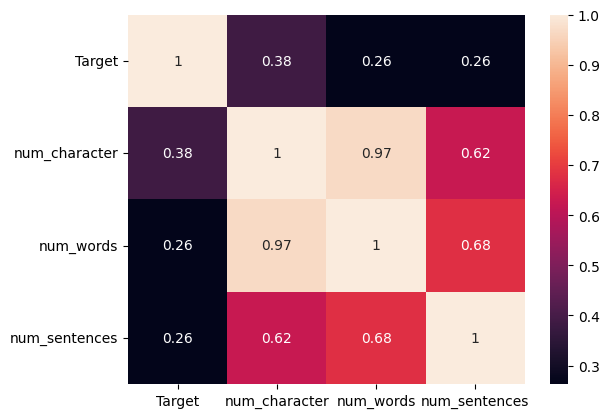

In [136]:
#Heat map
sns.heatmap(df.corr(),annot=True)

**3.Data Preprocessing**


    a.lower case
    b.Tokenization
    c.Removing special character
    d.Removing stop words and punctuation
    e.stemming

In [427]:
#function
def transform_text(text):
  text=text.lower()
  return text


In [428]:
#check
transform_text('I Am A Student')


'i am a student'

In [430]:
#Tokenization(split into words)
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  return text

In [431]:
#check
transform_text('I Am A Student')

['i', 'am', 'a', 'student']

In [432]:
#special character removal
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
        y.append(i)
  return y


In [433]:
#check
transform_text('I Am A Student %%$')

['i', 'am', 'a', 'student']

In [434]:
#removing stop words and punctuation
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [435]:
#punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [445]:
#removing stopwords
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  return y






In [446]:
#check
transform_text('I Am A Student? %%$?')

['student']

In [453]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return" ".join(y)

In [454]:
transform_text('I Am Loving the MachineLearning IN yt .What About you?')

'love machinelearn yt'

In [456]:
#Apply transformation
df['transform_text']=df['text'].apply(transform_text)
df['transform_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transform_text, Length: 5572, dtype: object

In [457]:
df.head()

,target,text,num_character,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


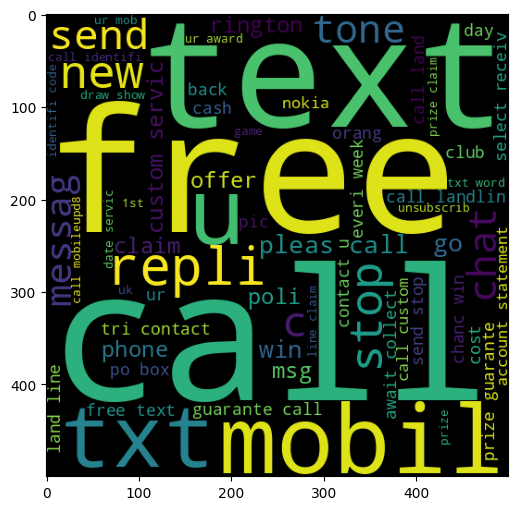

In [459]:
#Wordcloud(for spam)
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=""))
plt.figure(figsize=(15,6))
plt.imshow(wc)

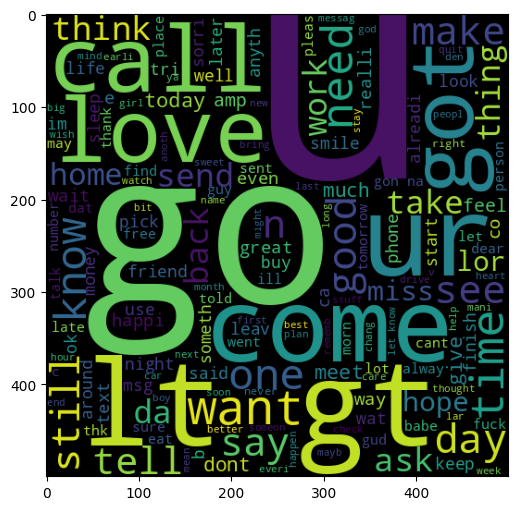

In [460]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=""))
plt.figure(figsize=(15,6))
plt.imshow(wc)

In [465]:
#top 50 words in spam
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in nltk.word_tokenize(msg):
    spam_corpus.append(word)


In [472]:
len(spam_corpus)

49711

In [469]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in nltk.word_tokenize(msg):
    ham_corpus.append(word)


In [471]:
len(ham_corpus)

38221

In [475]:
from collections import Counter
Counter(spam_corpus).most_common(30)


[('u', 1120),
 ('call', 656),
 ('2', 474),
 ('go', 451),
 ('get', 445),
 ('ur', 381),
 ('gt', 318),
 ('lt', 316),
 ('come', 300),
 ('4', 283),
 ('free', 278),
 ('know', 274),
 ('like', 257),
 ('love', 251),
 ('ok', 250),
 ('got', 249),
 ('time', 247),
 ('want', 244),
 ('day', 242),
 ('good', 242),
 ('text', 225),
 ('send', 205),
 ('need', 185),
 ('one', 184),
 ('txt', 182),
 ('today', 173),
 ('see', 172),
 ('take', 168),
 ('think', 165),
 ('home', 163)]

In [476]:
Counter(ham_corpus).most_common(30)

[('u', 979),
 ('go', 417),
 ('get', 357),
 ('gt', 318),
 ('lt', 316),
 ('2', 300),
 ('come', 295),
 ('call', 291),
 ('know', 248),
 ('ok', 245),
 ('like', 244),
 ('got', 242),
 ('love', 241),
 ('ur', 237),
 ('good', 230),
 ('time', 228),
 ('want', 212),
 ('day', 212),
 ('need', 174),
 ('one', 174),
 ('4', 163),
 ('lor', 162),
 ('home', 161),
 ('sorri', 156),
 ('see', 153),
 ('think', 151),
 ('da', 150),
 ('take', 149),
 ('still', 148),
 ('n', 139)]

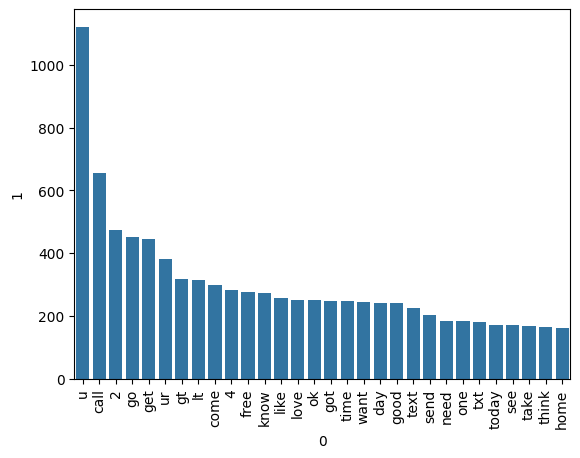

In [477]:
#bar plot
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**Model Building**

In [480]:
#Vectorisation
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['transform_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [481]:
X.shape

(5572, 6708)

In [482]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [483]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [489]:
#naive based method
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [485]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [491]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
y_pred1
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))


0.873542600896861
[[843 114]
 [ 27 131]]
0.5346938775510204
0.8291139240506329
0.6501240694789081


In [495]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
y_pred2
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))


0.9713004484304932
[[942  15]
 [ 17 141]]
0.9038461538461539
0.8924050632911392
0.8980891719745223


In [496]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
y_pred3
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))


0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921
0.7911392405063291
0.8802816901408451


**OR**

In [498]:
 from sklearn.feature_extraction.text import TfidfVectorizer
 tfidf=TfidfVectorizer()
 X=tfidf.fit_transform(df['transform_text']).toarray()
 X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [499]:
X.shape

(5572, 6708)

In [500]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [501]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [502]:
#naive based method
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [503]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [504]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
y_pred1
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))


0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135
0.7911392405063291
0.6313131313131313


In [505]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
y_pred2
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))


0.957847533632287
[[957   0]
 [ 47 111]]
1.0
0.7025316455696202
0.8252788104089219


In [506]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
y_pred3
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))


0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921
0.7911392405063291
0.8802816901408451


In [507]:
#we have choosen Tfidf-->mnb(giving accurate precision score)
#since target is imbalanced so precision score matters more than accuracy

In [508]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [509]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [510]:
#dictionary
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [511]:
#function
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [512]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9659192825112107, 0.9761904761904762)

In [513]:
#convert into data frame
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  print(name,current_accuracy,current_precision)


SVC 0.9659192825112107 0.9761904761904762
KN 0.8986547085201794 1.0
NB 0.957847533632287 1.0
DT 0.9255605381165919 0.8571428571428571
LR 0.9461883408071748 0.99
RF 0.9650224215246637 0.983739837398374
AdaBoost 0.9533632286995516 0.9344262295081968
BgC 0.9587443946188341 0.9242424242424242
ETC 0.9695067264573991 1.0
GBDT 0.9426008968609866 0.9607843137254902
xgb 0.9668161434977578 0.984


In [527]:
#arrange accuracy in ascending order
performance_df=pd.DataFrame({
    'Algorithm':clfs.keys(),
    'Accuracy':accuracy_scores,
    'precision':precision_scores
})
performance_df


,Algorithm,Accuracy,precision
0,SVC,0.965919,0.976190
1,KN,0.898655,1.000000
2,NB,0.957848,1.000000
3,DT,0.925561,0.857143
4,LR,0.946188,0.990000
5,RF,0.965022,0.983740
6,AdaBoost,0.953363,0.934426
7,BgC,0.958744,0.924242
8,ETC,0.969507,1.000000
9,GBDT,0.942601,0.960784


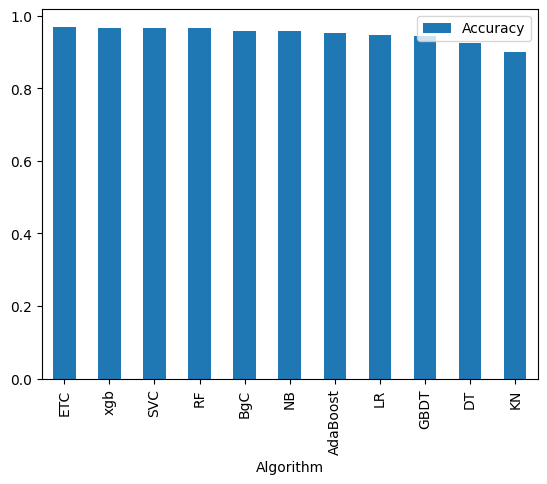

In [532]:
#bar graph
performance_df1=performance_df.sort_values(by='Accuracy',ascending=False)
performance_df1.plot(x='Algorithm',y='Accuracy',kind='bar')
plt.show()
